This notebook aims to explore different beam shape distribution in G4Beamline using the setting specific by the attached g4bl below

Primitive coding is done with minial library usage.

The following table keeps track of the beam result

| Beam name | Beam type | meanMomentum | sigmaP | sigmaX | sigmaY | meanXp | meanYp | sigmaXp | sigmaYp | Command                                                                                                                                               |
| --------- | --------- | ------------ | ------ | ------ | ------ | ------ | ------ | ------- | ------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1         | Ellipse   | 100          | 20     | 5      | 5      | 0      | 0      | 0.001   | 0.001   | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=5 \_sigmaY=5 \_meanXp=0 \_meanYp=0 \_sigmaXp=0.001 \_sigmaYp=0.001 | less     |
| 2         | Ellipse   | 100          | 20     | 5      | 5      | 0      | 0      | \-0.001 | \-0.001 | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=5 \_sigmaY=5 \_meanXp=0 \_meanYp=0 \_sigmaXp=-0.001 \_sigmaYp=-0.001 | less   |
| 3         | Ellipse   | 100          | 20     | \-5    | \-5    | 0      | 0      | \-0.001 | \-0.001 | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=-5 \_sigmaY=-5 \_meanXp=0 \_meanYp=0 \_sigmaXp=-0.001 \_sigmaYp=-0.001 | less |
| 4         | Gaussian  | 100          | 20     | 5      | 5      | 0      | 0      | 0.001   | 0.001   | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=5 \_sigmaY=5 \_meanXp=0 \_meanYp=0 \_sigmaXp=0.001 \_sigmaYp=0.001 | less     |
| 5         | Gaussian  | 100          | 20     | \-5    | \-5    | 0      | 0      | \-0.001 | \-0.001 | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=-5 \_sigmaY=-5 \_meanXp=0 \_meanYp=0 \_sigmaXp=-0.001 \_sigmaYp=-0.001 | less |
| 6         | Gaussian  | 100          | 20     | 5      | 5      | 0      | 0      | \-0.001 | \-0.001 | g4bl Pion_Line_BeamEllipse.g4bl \_meanMomentum=100 \_sigmaP=20 \_sigmaX=5 \_sigmaY=5 \_meanXp=0 \_meanYp=0 \_sigmaXp=-0.001 \_sigmaYp=-0.001 | less   |

In [40]:
"""
#  lengths are in mm, fields is Tesla !  Momentum in MeV
 
#______________________________________________________________________


#------------------------------- Setup -------------------------------#
 
 
# Must add kill=$kill_aperture to every element to use this feature.

param kill_aperture=1
 
 

 
#physics QGSP_BERT disable=Decay
physics QGSP_BERT


#---------------------------- Define World and Beam -------------------------#

# Set default environment material
param worldMaterial=Vacuum


#BEAM
# Ellipse beam only takes X, Xp, Y, Yp,  T,E 
# Xp is x prime, which is decay angle
param _meanMomentum=100
param _sigmaP=20
param _nEvents=100000
param _sigmaX=5
param _sigmaY=5
param _meanXp=0
param _meanYp=0
param _sigmaXp=0.001
param _sigmaYp=0.001
param _beamZ=16
beam ellipse meanMomentum=$_meanMomentum sigmaP=$_sigmaP nEvents=100000 particle=pi- sigmaX=$_sigmaX sigmaY=$_sigmaY \\
meanXp=$_meanXp meanYp=$_meanYp sigmaXp=$_sigmaXp sigmaYp=$_sigmaYp beamZ=$_beamZ



# Only pay attention to the following particles (saves on calculation time) 
particlecolor pi-=1,0,0 mu-=0,1,0
trackcuts keep=mu-,pi-

 

#--------------------------- Bckground Color --------------------------#

 
# Scaling GUI view from pg 19 of the manual
 
g4ui when=4 "/vis/viewer/scaleTo 10 10 1"


#--------------------------- Define Beamline Elements --------------------------#


# Parameters
param Tw=15 Th=30 Tl=30
param Tm=W

param QUADfieldlength13=1076.3
param QUADgradient13=0.140
param QUADironLength13=1076.3

param QUADfieldlength2=1452.6
param QUADgradient2=-0.155
param QUADironLength2=1452.525

param QUADapertureRadius=49.15
param QUADironRadius=50.8
param SOLinnerRadius=20.0
param SOLouterRadius=22.0
param SOLlength=130.0
param SOLmaxZ=64.0
param SOLcurrent=158.2


box Target width=$Tw height=$Th length=$Tl material=W color=1.0,0.75,0.0 kill=$kill_aperture \ 


genericquad Quad2 fieldLength=$QUADfieldlength2 apertureRadius=$QUADapertureRadius ironLength=$QUADironLength2 \
ironRadius=$QUADironRadius ironColor=0,0,1,.3 \
gradient=$QUADgradient2 fringeFactor=10.0 kill=$kill_aperture


genericquad Quad13 fieldLength=$QUADfieldlength13 apertureRadius=$QUADapertureRadius ironLength=$QUADironLength13 \
ironRadius=$QUADironRadius ironColor=0,0,1,.3 \
gradient=$QUADgradient13 fringeFactor=10.0 kill=$kill_aperture

// coil does not permit kill parameter
coil LLS innerRadius=$SOLinnerRadius outerRadius=$SOLouterRadius length=$SOLlength

solenoid LomaLindaSolenoid coilName=LLS current=$SOLcurrent  color=1,0,0,.3 kill=$kill_aperture


tubs TargetToSolenoid material=STAINLESS-STEEL outerRadius=70.0 innerRadius=60.0 length=355.6  color=.2,.2,.2,.3 kill=$kill_aperture

tubs SolenoidToQUAD1 material=STAINLESS-STEEL outerRadius=50.8 innerRadius=49.15 length=231.45  color=.2,.2,.2,.3 kill=$kill_aperture

tubs QUADGap material=STAINLESS-STEEL outerRadius=50.8 innerRadius=49.15 length=304.8  color=.2,.2,.2,.3 kill=$kill_aperture

tubs QUAD3ToStraw material=STAINLESS-STEEL outerRadius=50.8 innerRadius=49.15 length=388.9  color=.2,.2,.2,.3 kill=$kill_aperture

tubs Straw material=STAINLESS-STEEL outerRadius=17.525 innerRadius=15.875 length=585.2  color=.2,.2,.2,.3 kill=$kill_aperture







#---------------------- Define Virtual Detectors for scoring -----------------------#

virtualdetector Det radius=15.875 length=1 color=1,1,1 material=Vacuum format=ascii


#---------------------- Place Beamline Elements -----------------------#

place Target rename=target z=0.0
place TargetToSolenoid rename=T2S z=192.8
place LomaLindaSolenoid z=435.6
place SolenoidToQUAD1 rename=S2Q z=616.325
place Quad13 rename=Q1 z=1270.2
place QUADGap rename=QGap12 z=1960.75
place Quad2 rename=Q2 z=2839.4125
place QUADGap rename=QGap23 z=3718.075
place Quad13 rename=Q3 z=4408.625
place QUAD3ToStraw rename=Q2Str z=5141.225
place Straw z=5628.275

#---------------------- Place Virtual Detectors -----------------------#
place Det rename=1_detector_1 z=20
#place Det rename=detector2 z=732.55
#place Det rename=detector3 z=1961.25
#place Det rename=detector4 z=3565
#place Det rename=detector5 z=3718.575
#place Det rename=detector6 z=4947.275
#place Det rename=detector7 z=5921.375
place Det rename=1_detector_8 z=5921
#zntuple z=17
#zntuple z=732.05
#zntuple z=1960.75
#zntuple z=2839.4125
#zntuple z=3718.575
#zntuple z=4946.775
#zntuple z=5920.85


#profile zloop=0:6000:50 particle=mu- require=True file=BeamEllipseTransport.txt
"""

'\n#  lengths are in mm, fields is Tesla !  Momentum in MeV\n \n#______________________________________________________________________\n\n\n#------------------------------- Setup -------------------------------#\n \n \n# Must add kill=$kill_aperture to every element to use this feature.\n\nparam kill_aperture=1\n \n \n\n \n#physics QGSP_BERT disable=Decay\nphysics QGSP_BERT\n\n\n#---------------------------- Define World and Beam -------------------------#\n\n# Set default environment material\nparam worldMaterial=Vacuum\n\n\n#BEAM\n# Ellipse beam only takes X, Xp, Y, Yp,  T,E \n# Xp is x prime, which is decay angle\nparam _meanMomentum=100\nparam _sigmaP=20\nparam _nEvents=100000\nparam _sigmaX=5\nparam _sigmaY=5\nparam _meanXp=0\nparam _meanYp=0\nparam _sigmaXp=0.001\nparam _sigmaYp=0.001\nparam _beamZ=16\nbeam ellipse meanMomentum=$_meanMomentum sigmaP=$_sigmaP nEvents=100000 particle=pi- sigmaX=$_sigmaX sigmaY=$_sigmaY \\\nmeanXp=$_meanXp meanYp=$_meanYp sigmaXp=$_sigmaXp sigmaYp=

In [41]:
import sys
sys.path.append('..')
import g4blplot
import matplotlib.pyplot as plt
import numpy
import mpl_scatter_density
%matplotlib inline  

I place two detectors, positive_ellipse_detector_1 and positive_ellipse_detector_8, which will output two txt files with the same name.
The first detector is 5mm away from beam source.
I then use the first detector's data to plot each particle's position against its angle to see if the distribution is truly ellipse,

# Beam 1 (Default)

Run the following code into the terminal (provided you are on Linux / Mac)

## At detector 1
The following code graphs the distribution of pi- at detector 1, 5mm away from the beam source

Text(0, 0.5, 'y angle')

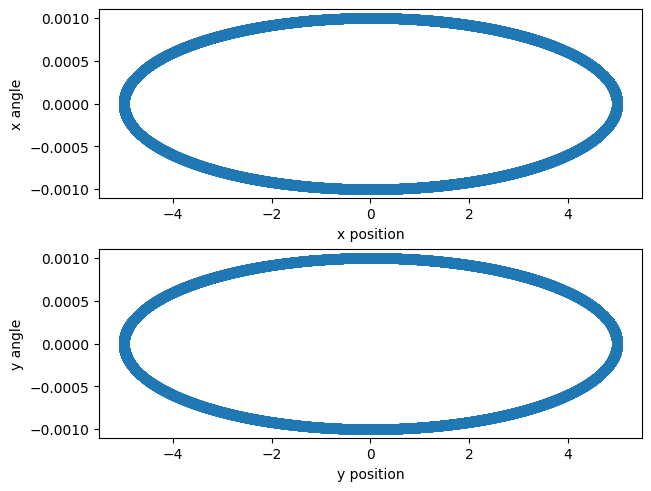

In [42]:
raw_data = g4blplot.add_text_file(f"1_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], x, xp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

## At detector 8
Interesting things start happening at the end of the beamline, at detector 8.
Running the same code as above, but changing the detector number to 8 instead of 1, we get the following distribution of pi-

Text(0, 0.5, 'y angle')

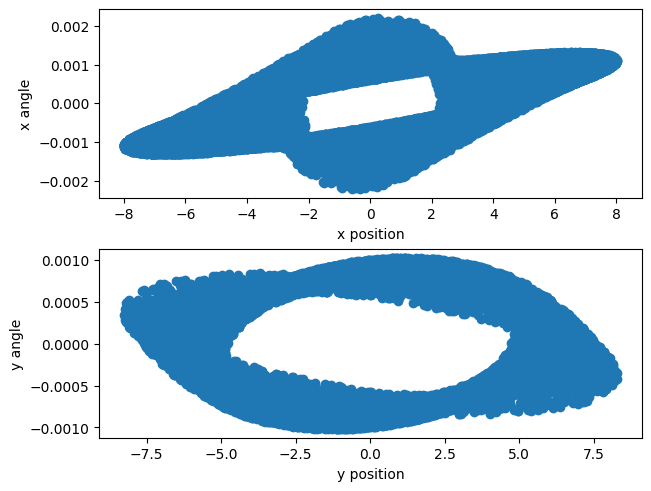

In [43]:
raw_data = g4blplot.add_text_file(f"1_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

# Beam 2: Negative sigmaXp, sigmaYp with beam ellipse

I then try adjusting the sigma Xp,Yp from 0.001 to -0.001 to see if it will fill the distribution of the ellipse.
The file will be 2_detector_1.txt and 2_detector_2.txt

## At detector 1

At detector 1, 5mm from beam source, with sigmaP negative, considering only pion-

Text(0, 0.5, 'y angle')

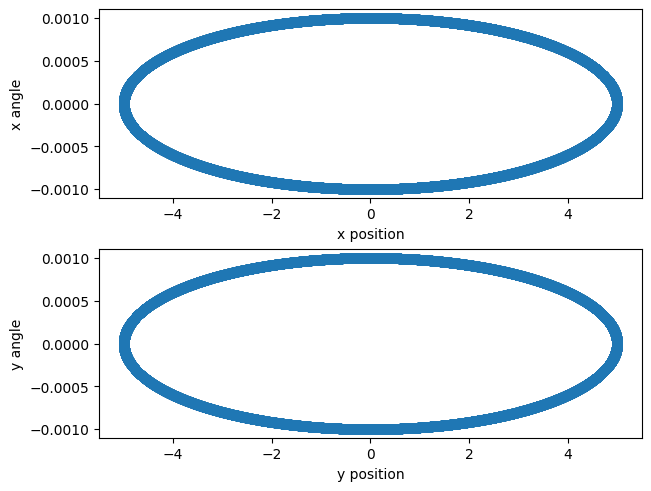

In [44]:
raw_data = g4blplot.add_text_file("2_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

With sigmaXp and sigmaYp < 0, we still see only pi- distributed *on* the ellipse.

## At detector 8

Samething happens with negative sigmaXp and sigmaYp at detector 8, 5905mm from beam source

Text(0, 0.5, 'y angle')

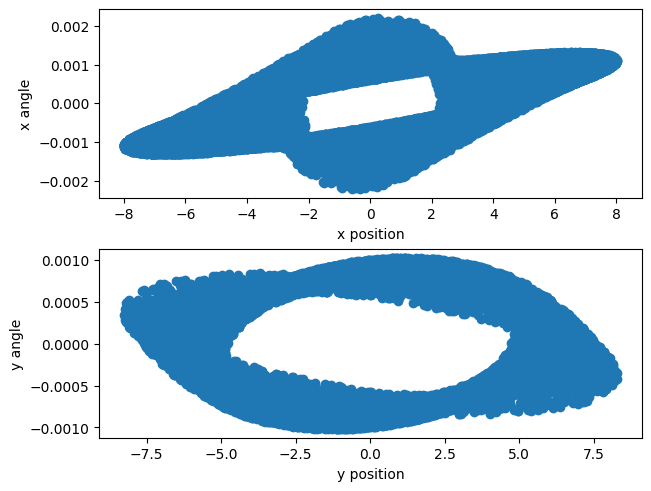

In [45]:
raw_data = g4blplot.add_text_file("2_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

# Beam 3: Negative sigmaX, sigmaY, sigmaXp, sigma Yp
Pass the following code into terminal (Linux/Mac)

## Detector 1

Text(0, 0.5, 'y angle')

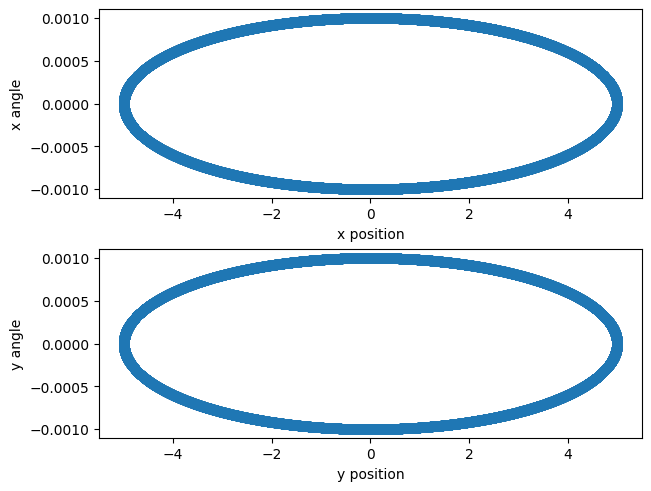

In [46]:
raw_data = g4blplot.add_text_file("3_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

## Detector 8

Text(0, 0.5, 'y angle')

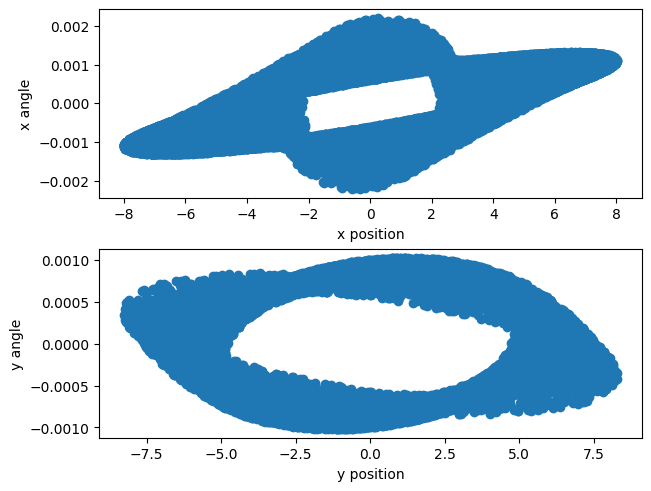

In [47]:
raw_data = g4blplot.add_text_file("3_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

For gaussian beam type, I change the type of beam manually in the .g4bl file

# Beam 4: Default parameters with beam gaussian 

Run the following bash code in the terminal (Linux/Mac)

## At detector 1

Text(0, 0.5, 'y angle')

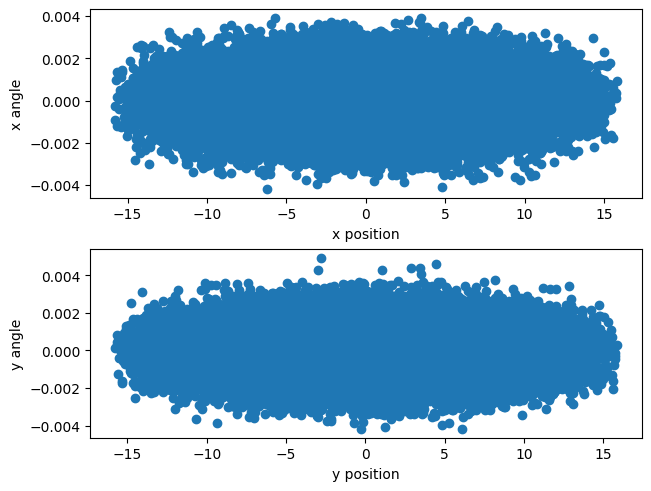

In [48]:
raw_data = g4blplot.add_text_file("4_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

To show that the density of the particle is densest in the center and gets less dense as we move further away from the center, we can use heatmap.

Text(0, 0.5, 'y angle')

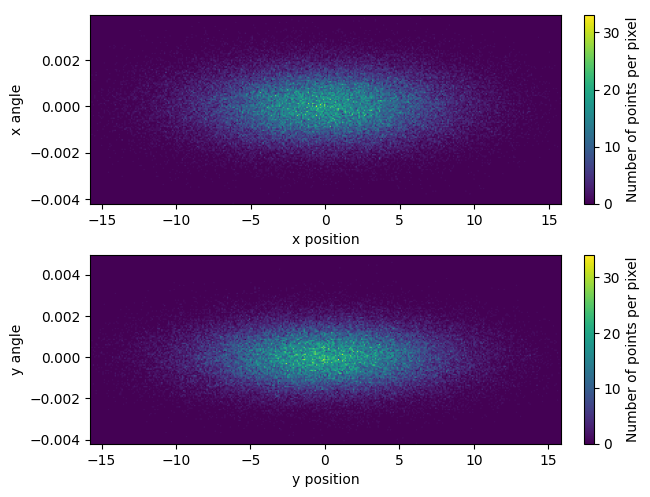

In [49]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

## Detector 8
Again, I show the setting of the gaussian beam with positive sigmaXp, sigmaYp at detector 8

Text(0, 0.5, 'y angle')

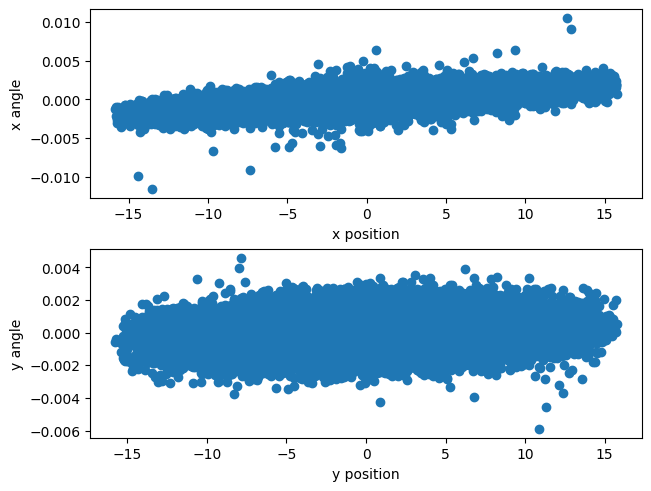

In [50]:
raw_data = g4blplot.add_text_file("4_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

I also use heatmap to show the result at detector 8

Text(0, 0.5, 'y angle')

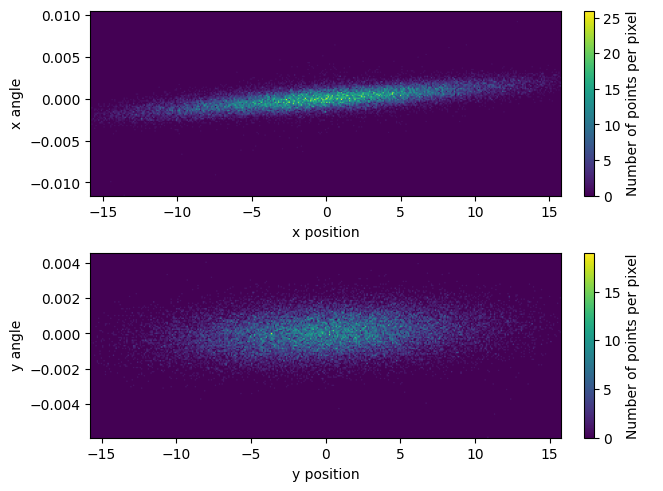

In [51]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

# Beam 5: Negative sigmaX, sigmaY, sigmaXp, sigmaYp with beam gaussian

## At detector 1

Text(0, 0.5, 'y angle')

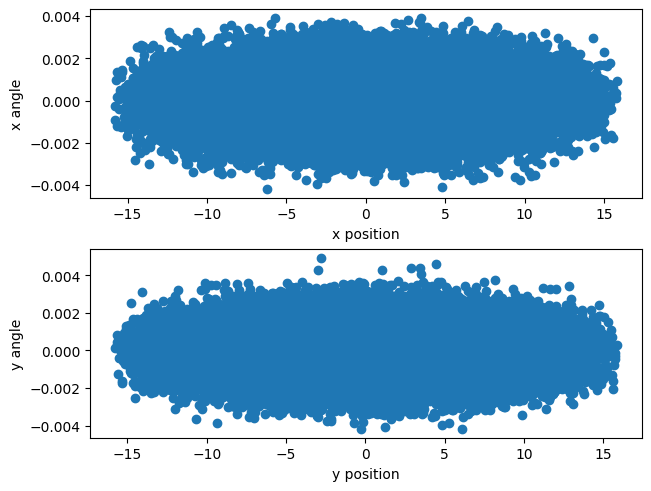

In [52]:
raw_data = g4blplot.add_text_file("5_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

With heatmap:

Text(0, 0.5, 'y angle')

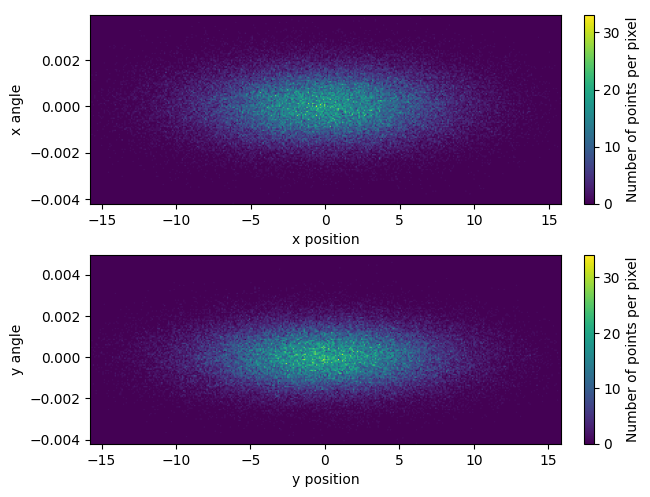

In [53]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

## At detector 8

Text(0, 0.5, 'y angle')

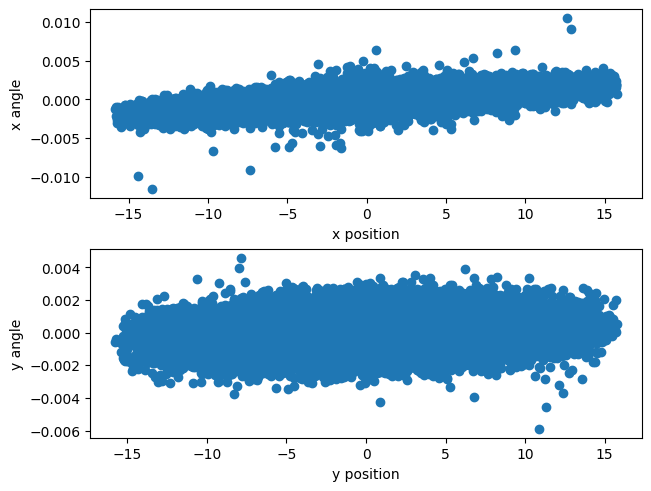

In [54]:
raw_data = g4blplot.add_text_file("5_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

With heatmap:

Text(0, 0.5, 'y angle')

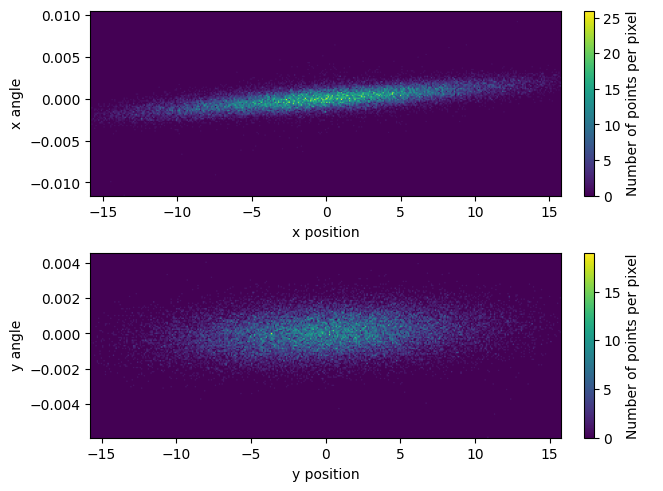

In [55]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

# Beam 6

## Detector 1

Text(0, 0.5, 'y angle')

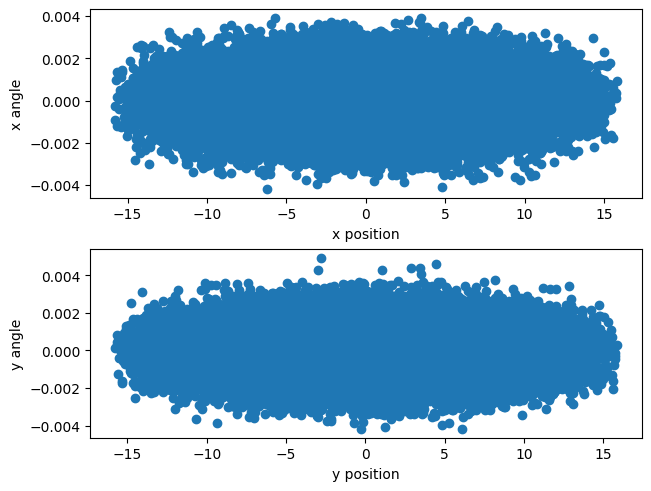

In [56]:
raw_data = g4blplot.add_text_file("6_detector_1.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

Heatmap: 

Text(0, 0.5, 'y angle')

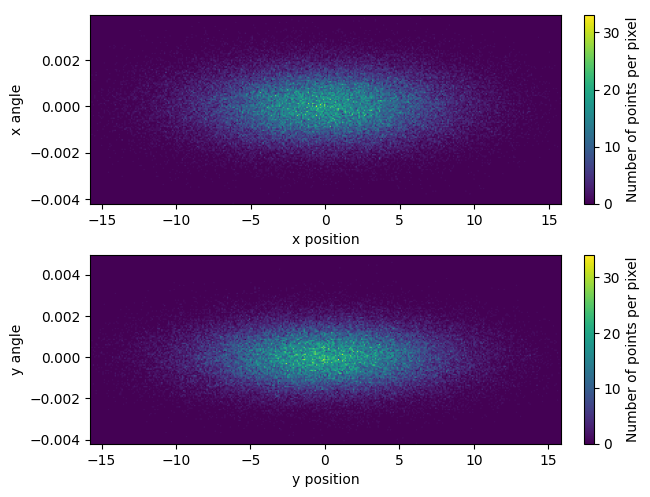

In [57]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

## Detector 8

Text(0, 0.5, 'y angle')

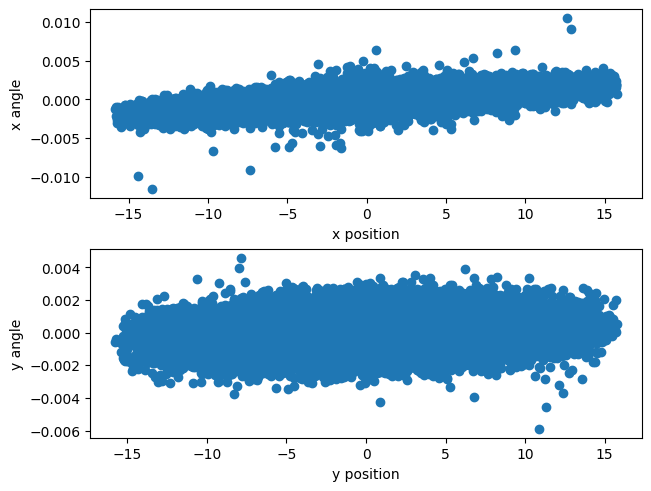

In [58]:
raw_data = g4blplot.add_text_file("6_detector_8.txt")

data = g4blplot.extract_particle_data(raw_data,"pi-")
x = g4blplot.get_feature(data,'x')
y = g4blplot.get_feature(data,'y')
xp = g4blplot.get_xangle(data)
yp = g4blplot.get_yangle(data)

figure, axes = plt.subplots(2,layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0], x, xp)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")


g4blplot.scatter_plot(axes[1], y, yp)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")

Heatmap:

Text(0, 0.5, 'y angle')

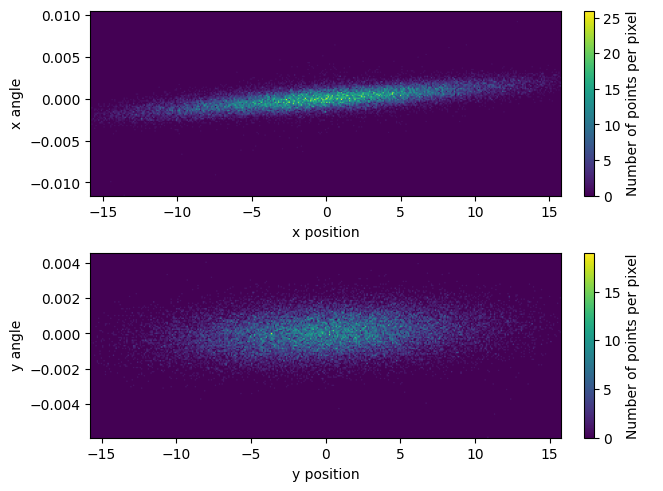

In [59]:
figure, axes = plt.subplots(2, layout="constrained", subplot_kw=dict(projection="scatter_density"))

g4blplot.scatter_plot(axes[0],x,xp, heat_map=True)
axes[0].set_xlabel("x position")
axes[0].set_ylabel("x angle")

g4blplot.scatter_plot(axes[1],y,yp, heat_map=True)
axes[1].set_xlabel("y position")
axes[1].set_ylabel("y angle")